In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv(r'D:\Python Projects\Time Series Forecasting\gold_monthly_csv.csv')
print(f"Gold prices data has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The date range of gold prices available is from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df) - 1]}")
df.head()

Gold prices data has 847 rows and 2 columns.
The date range of gold prices available is from 1950-01 to 2020-07


Date  Price
0  1950-01  34.73
1  1950-02  34.73
2  1950-03  34.73
3  1950-04  34.73
4  1950-05  34.73

In [8]:
# Create a new dataframe with monthly dates as the index
date_range = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
df['month'] = date_range
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

Price
month            
1950-01-31  34.73
1950-02-28  34.73
1950-03-31  34.73
1950-04-30  34.73
1950-05-31  34.73

<Figure size 2000x800 with 0 Axes>

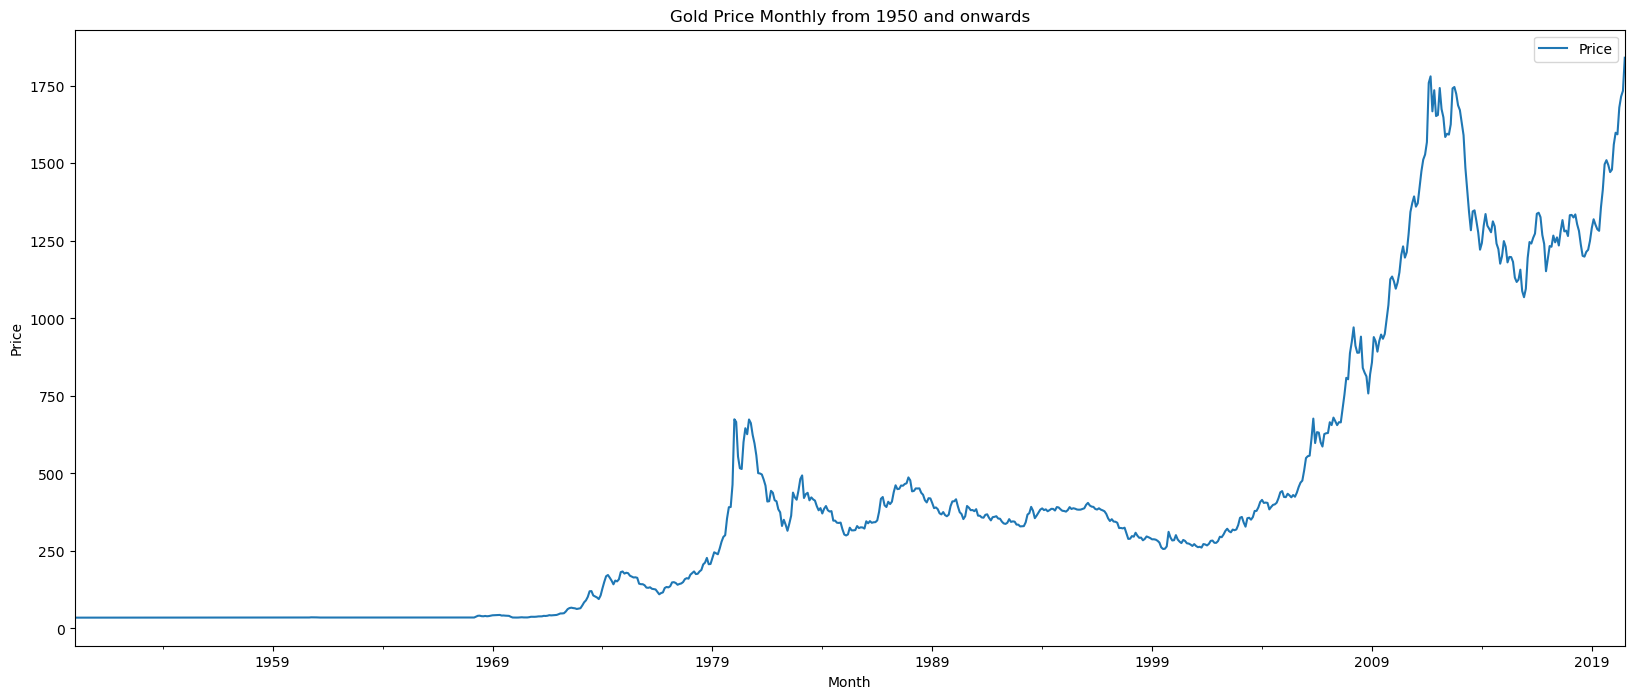

In [9]:
# Plot the gold prices over time
plt.figure(figsize=(20,8))
df.plot(figsize=(20,8))
plt.title('Gold Price Monthly from 1950 and onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

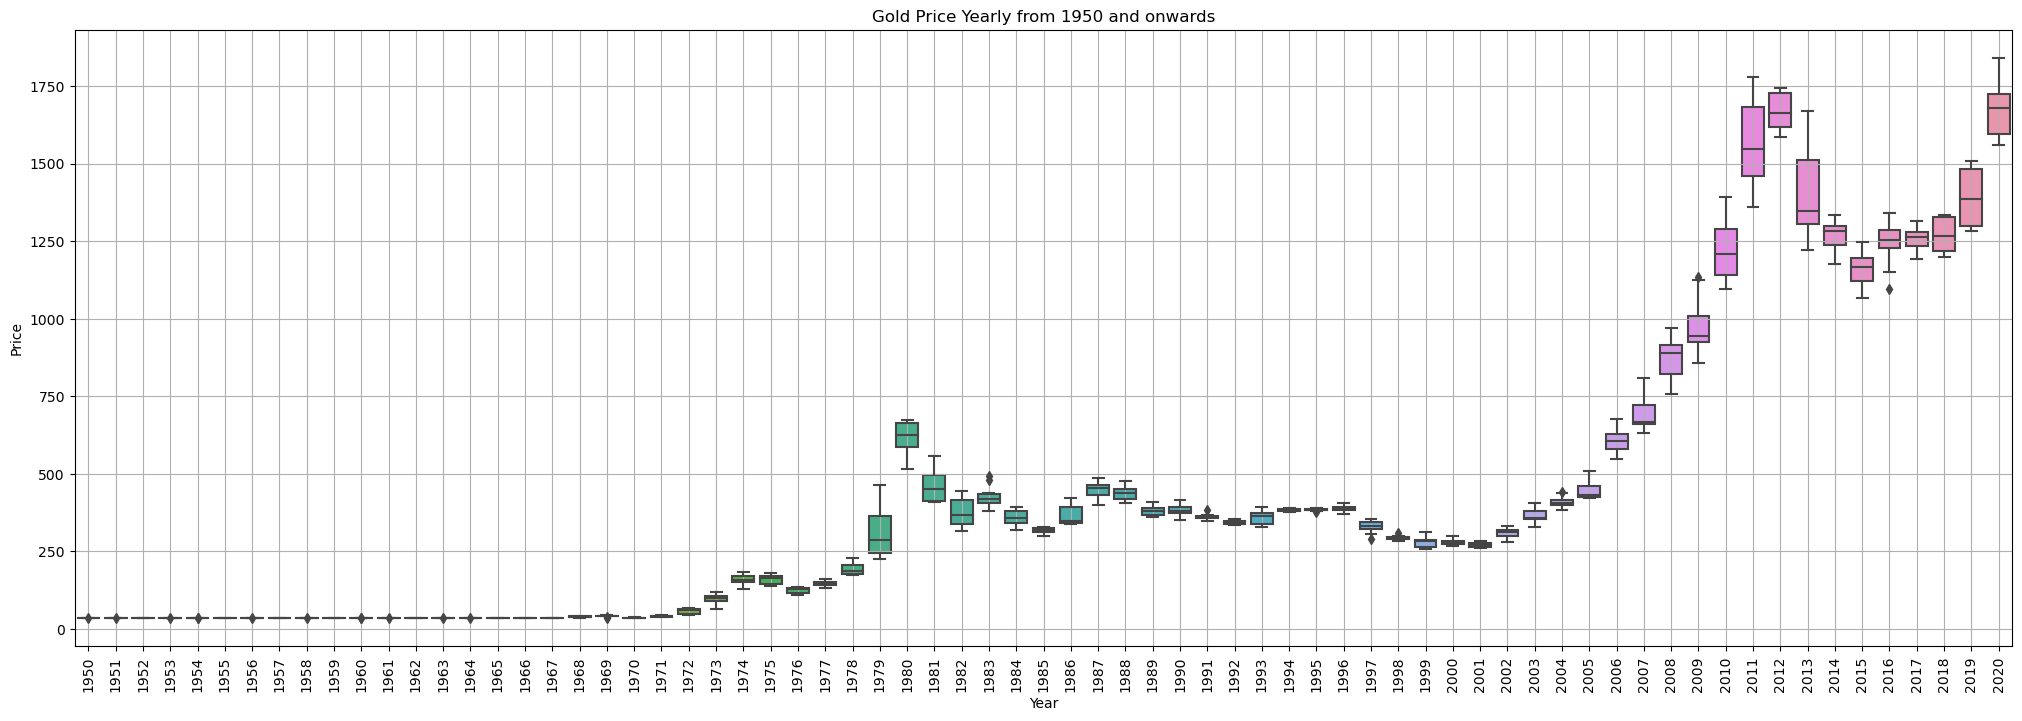

In [10]:
# Create a boxplot of the gold prices by year
plt.figure(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0])
plt.title('Gold Price Yearly from 1950 and onwards')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [11]:
# Show summary statistics of the gold prices
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


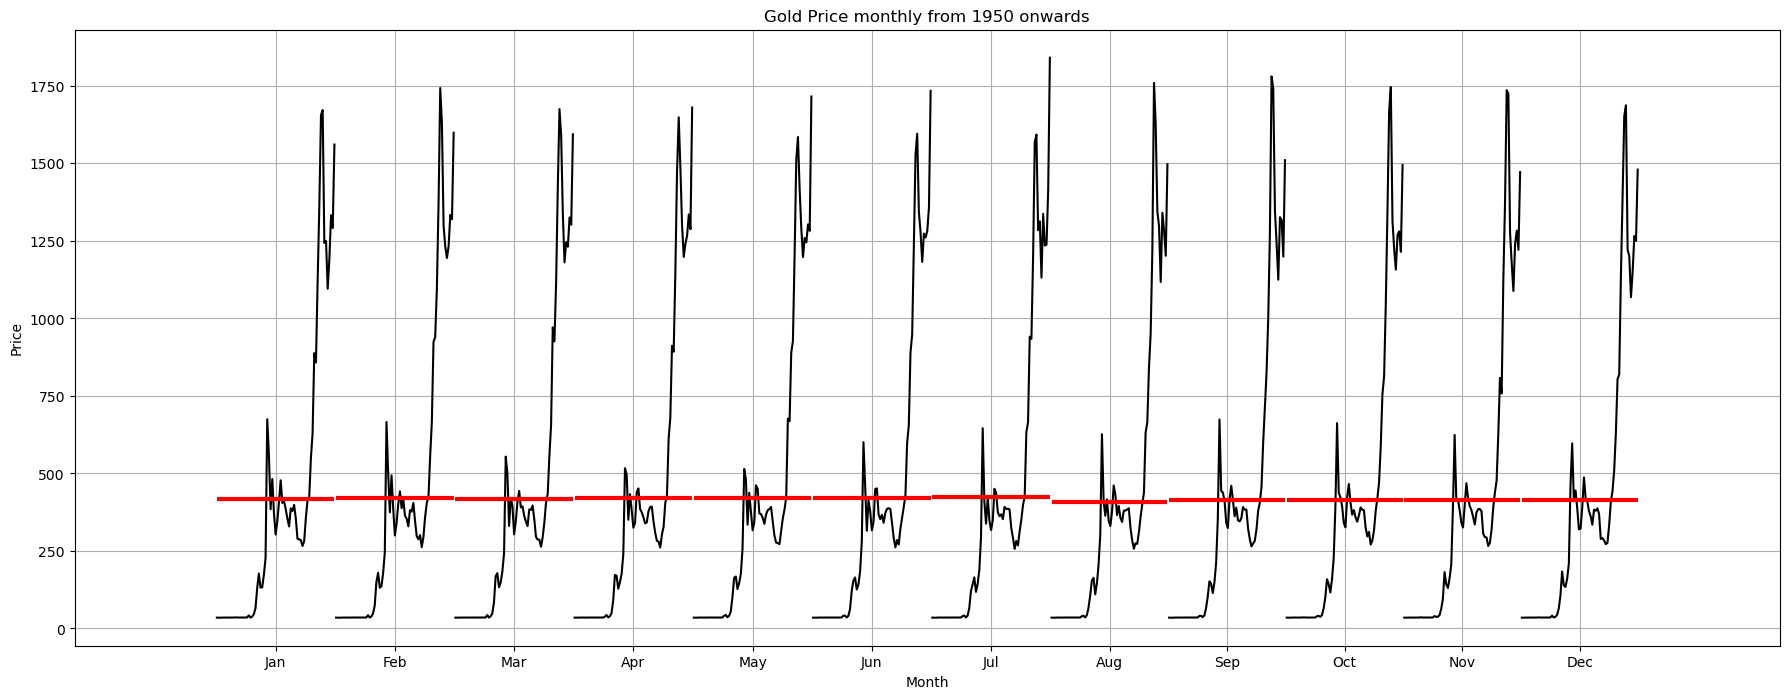

In [12]:
from statsmodels.graphics.tsaplots import month_plot

# Plot the gold prices by month
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel='Gold Price', ax=ax)
plt.title('Gold Price monthly from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show()

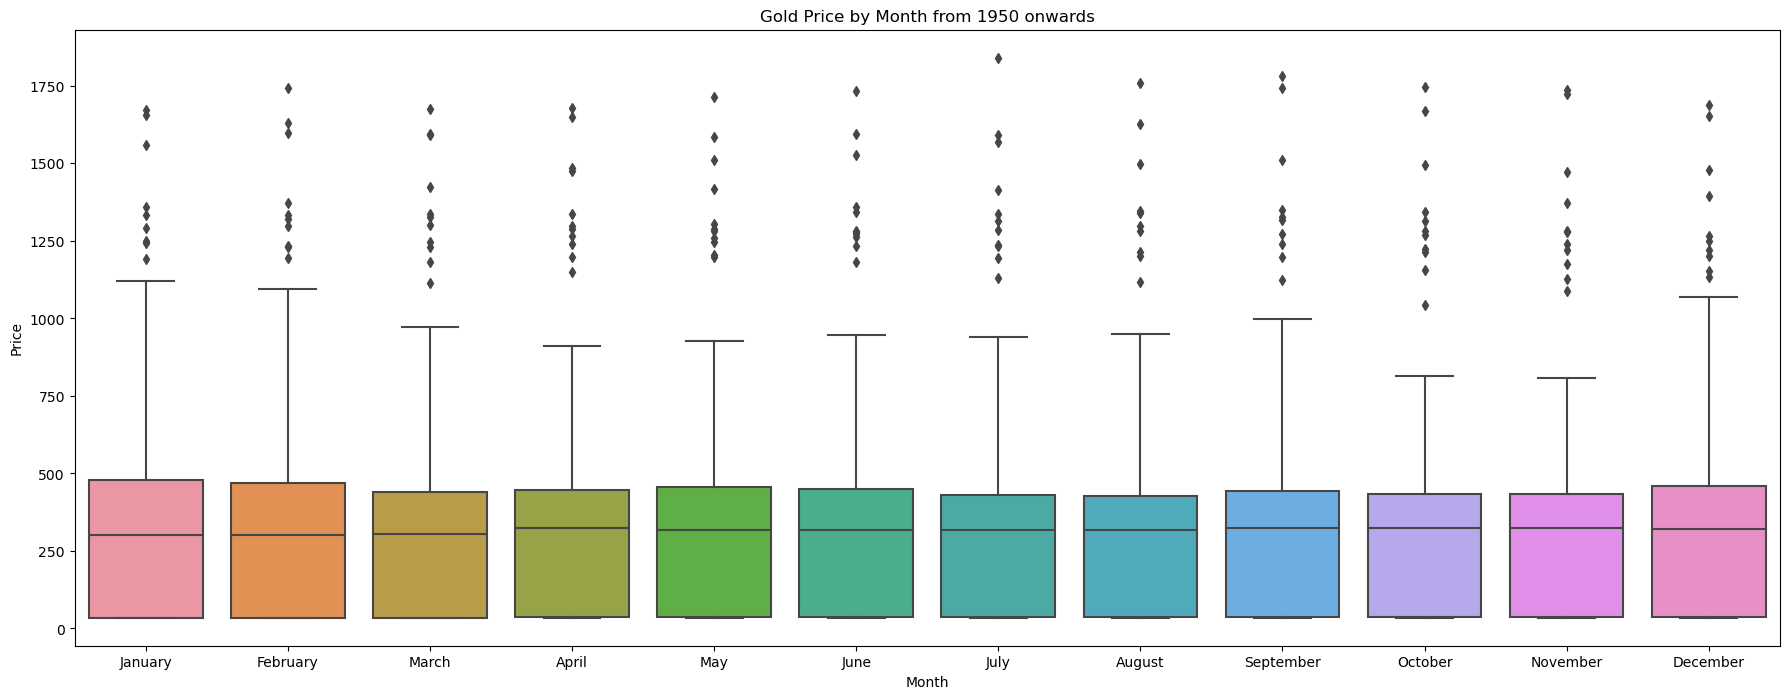

In [13]:
# Create a boxplot of the gold prices by month
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('Gold Price by Month from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

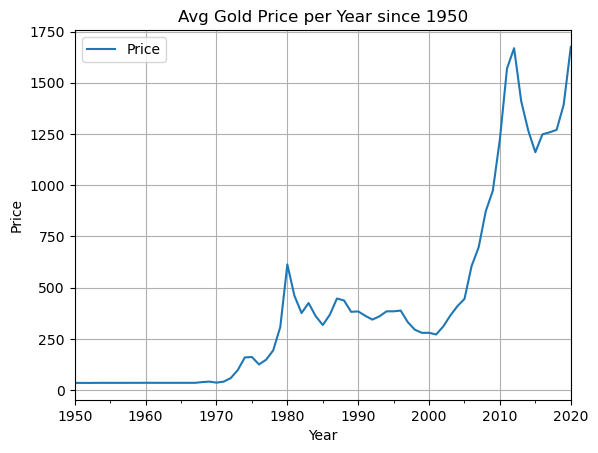

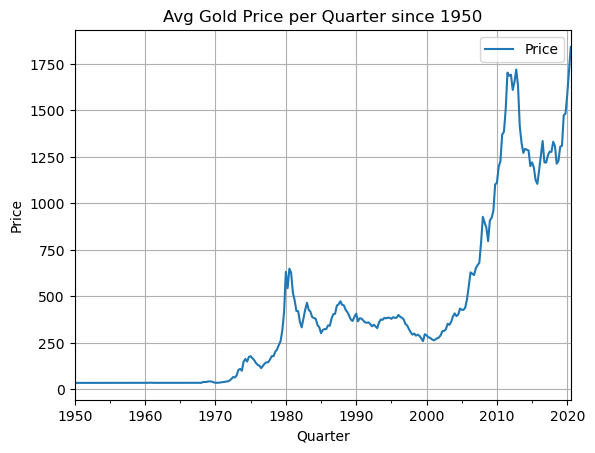

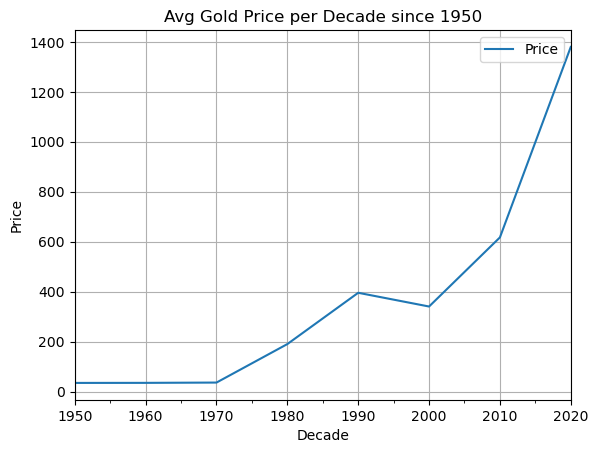

In [14]:
# Create yearly, quarterly, and decade summaries of the data
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Avg Gold Price per Year since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Price per Quarter since 1950')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()

df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg Gold Price per Decade since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()

In [15]:
# Show summary statistics of the gold prices
print("Summary statistics of gold prices:\n", df.describe())

Summary statistics of gold prices:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


The first few rows of the coefficient of variation data:
            Mean       Std  Cov_pct
month                              
1950   34.729167  0.002887     0.01
1951   34.717500  0.020057     0.06
1952   34.628333  0.117538     0.34
1953   34.879167  0.056481     0.16
1954   35.020000  0.082792     0.24


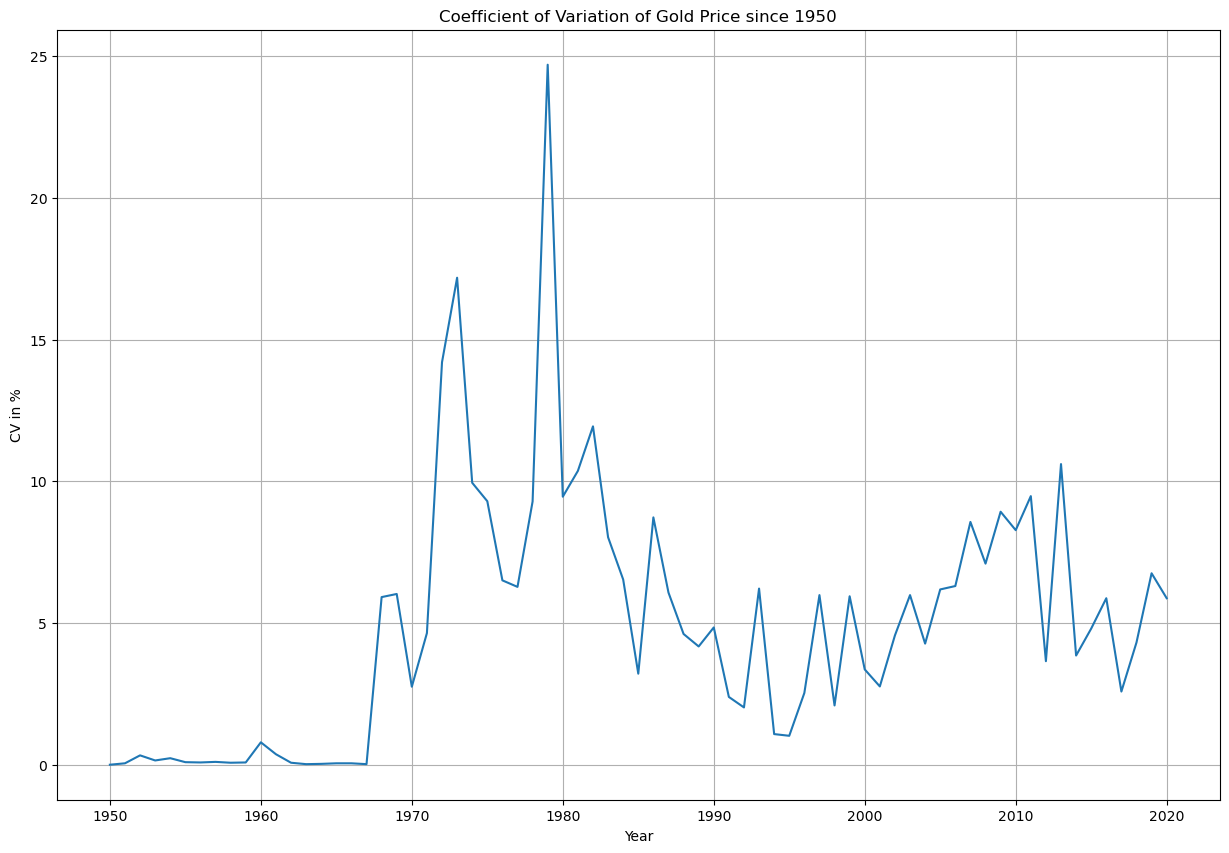

In [16]:
# Calculate the mean, standard deviation, and coefficient of variation (CV) for the data by year
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)

# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
df_1['Cov_pct'].plot()
plt.title('Coefficient of Variation of Gold Price since 1950')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

# Display the first few rows of the data
print('The first few rows of the coefficient of variation data:')
print(df_1.head())

In [18]:
# Split the dataset into training and testing sets based on a cutoff year
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]


# Check the shape of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

# Checking for bias in the split
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')

# It is not necessarily biased to split the data this way. 
# However, it may depend on the specific problem and the goals of the analysis. 
# It is always a good practice to carefully consider the split and to test different split ratios to evaluate their impact on t

Training set shape: (792, 1)
Testing set shape: (55, 1)
Percentage of data in training set: 93.51 %
Percentage of data in testing set: 6.49 %


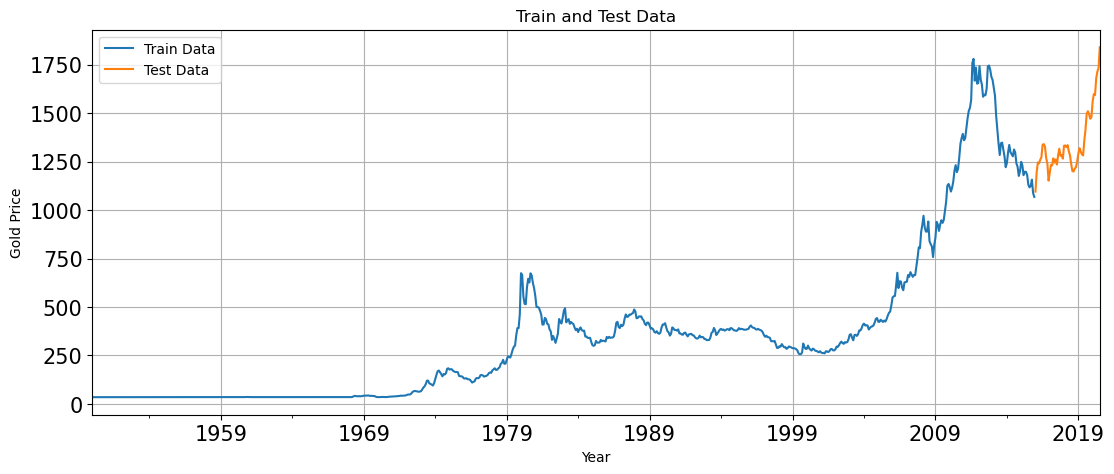

In [19]:
# Plot train and test data
train['Price'].plot(figsize=(13,5), fontsize=15)
test['Price'].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

In [20]:
# Create time series for train and test data
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(f"Train time series length: {len(train_time)}")
print(f"Test time series length: {len(test_time)}")

# Add time series as a feature to train and test data
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

Train time series length: 792
Test time series length: 55


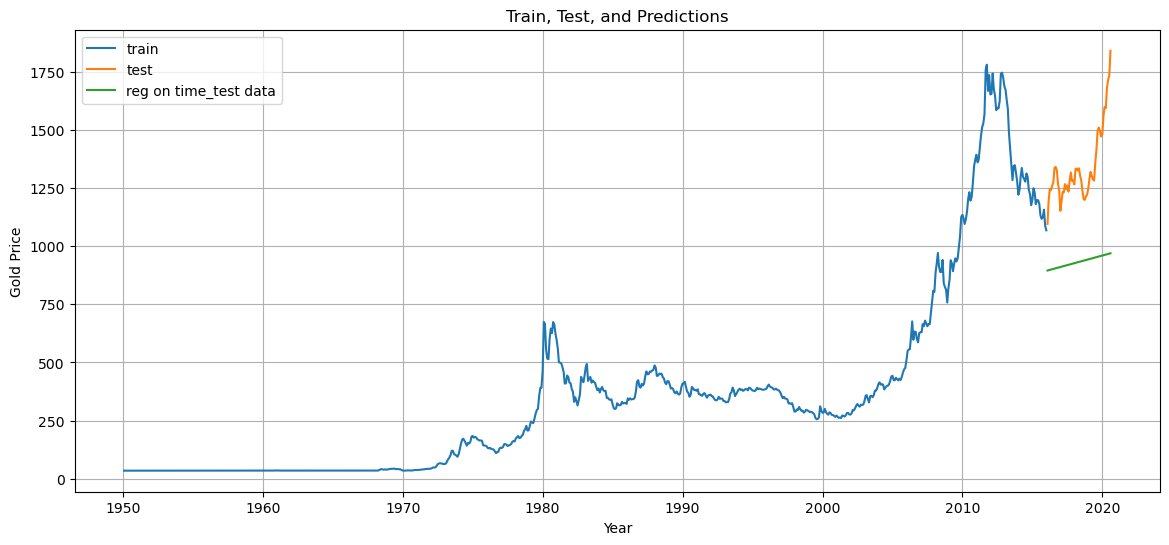

In [21]:
# Train a linear regression model on the train data using time as the independent variable
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

# Use the trained model to make predictions on the test data
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

# Plot the train data, test data, and predictions made by the linear regression model
plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc='best')
plt.grid()
plt.title('Train, Test, and Predictions')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

In [22]:
def mape(y_true, y_pred):
    """Calculate mean absolute percentage error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the linear regression model
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print(f"MAPE for Regression on Time model on test data: {mape_model1_test:.3f}%")

MAPE for Regression on Time model on test data: 29.760%


In [23]:
# Create results dataframe to store MAPE values for different models
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]}, index=['Regression on Time'])
results

Test MAPE (%)
Regression on Time      29.759658

In [24]:

# Create naive model
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.asarray(train['Price']) [len(np.asarray(train['Price'])) - 1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

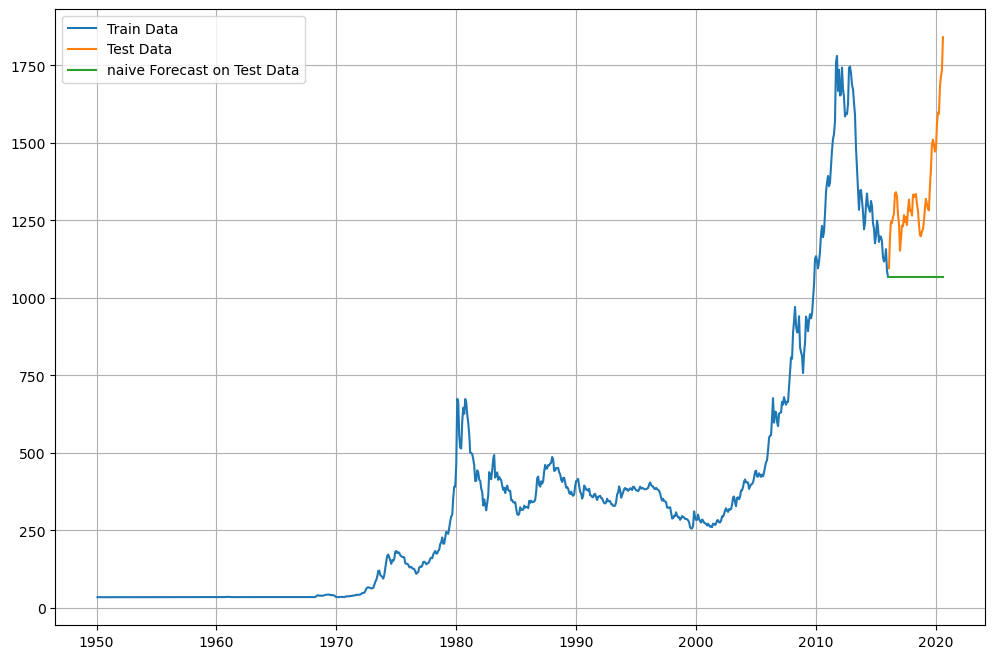

In [25]:
# Plot the train, test, and naive forecast on test data
plt.figure(figsize=(12,8))
plt.plot(naive_train['Price'], label='Train Data')
plt.plot(test['Price'], label='Test Data')
plt.plot(naive_test['naive'], label='naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid()

In [26]:
# Calculate MAPE for naive forecast model
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print('MAPE for naive Forecast model is %3.3f%%' % mape_model2_test)

# Update the dataframe with the MAPE result for the naive forecast model
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['naiveForecast'])
results = pd.concat([results,resultsDf_2])

# Display the dataframe with the MAPE results for both models
results

MAPE for naive Forecast model is 19.385%


Test MAPE (%)
Regression on Time      29.759658
naiveForecast           19.384586

In [27]:
# Perform exponential smoothing with additive trend and additive seasonality
final_model = ExponentialSmoothing(df, trend='additive', seasonal='additive').fit(
    smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)

# Calculate mean absolute percentage error (MAPE) of the fitted values
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('MAPE of final model: %.3f%%' % mape_final_model)

MAPE of final model: 17.235%


In [28]:
# Generate forecast using the final model
prediction = final_model.forecast(steps=len(test))

# Create a dataframe to store the prediction and confidence intervals
pred_df = pd.DataFrame({
    'lower_CI': prediction - 1.96 * np.std(final_model.resid, ddof=1),
    'prediction': prediction,
    'upper_CI': prediction + 1.96 * np.std(final_model.resid, ddof=1)
})
# Export the predictions into a csv file.
pred_df.to_csv('gold_price_predictions.csv', index=True, index_label='Month') 

print('Prediction and confidence intervals:')
pred_df

Prediction and confidence intervals:


lower_CI   prediction     upper_CI
2020-08-31  1684.718274  1792.869246  1901.020219
2020-09-30  1615.301815  1723.452788  1831.603760
2020-10-31  1538.560879  1646.711851  1754.862823
2020-11-30  1476.748832  1584.899804  1693.050776
2020-12-31  1459.315210  1567.466182  1675.617154
2021-01-31  1514.403893  1622.554865  1730.705837
2021-02-28  1545.337867  1653.488839  1761.639811
2021-03-31  1556.749789  1664.900761  1773.051733
2021-04-30  1648.295729  1756.446701  1864.597673
2021-05-31  1694.212521  1802.363493  1910.514465
2021-06-30  1743.389239  1851.540211  1959.691183
2021-07-31  1796.095610  1904.246582  2012.397554
2021-08-31  1785.022831  1893.173803  2001.324775
2021-09-30  1715.606372  1823.757344  1931.908316
2021-10-31  1638.865435  1747.016408  1855.167380
2021-11-30  1577.053388  1685.204360  1793.355333
2021-12-31  1559.619766  1667.770738  1775.921710
2022-01-31  1614.708449  1722.859421  1831.010393
2022-02-28  1645.642423  1753.793396  1861.944368
2022-03-31  1657.054345  1765.205317  1873.356289
2022-04-30  1748.600285  1856.751257  1964.902230
2022-05-31  1794.517077  1902.668049  2010.819022
2022-06-30  1843.693795  1951.844767  2059.995740
2022-07-31  1896.400166  2004.551138  2112.702111
2022-08-31  1885.327387  1993.478359  2101.629331
2022-09-30  1815.910928  1924.061900  2032.212873
2022-10-31  1739.169992  1847.320964  1955.471936
2022-11-30  1677.357945  1785.508917  1893.659889
2022-12-31  1659.924322  1768.075295  1876.226267
2023-01-31  1715.013005  1823.163978  1931.314950
2023-02-28  1745.946980  1854.097952  1962.248924
2023-03-31  1757.358901  1865.509874  1973.660846
2023-04-30  1848.904842  1957.055814  2065.206786
2023-05-31  1894.821634  2002.972606  2111.123578
2023-06-30  1943.998352  2052.149324  2160.300296
2023-07-31  1996.704723  2104.855695  2213.006667
2023-08-31  1985.631943  2093.782916  2201.933888
2023-09-30  1916.215485  2024.366457  2132.517429
2023-10-31  1839.474548  1947.625520  2055.776493
2023-11-30  1777.662501  1885.813473  1993.964445
2023-12-31  1760.228879  1868.379851  1976.530823
2024-01-31  1815.317562  1923.468534  2031.619506
2024-02-29  1846.251536  1954.402508  2062.553481
2024-03-31  1857.663458  1965.814430  2073.965402
2024-04-30  1949.209398  2057.360370  2165.511342
2024-05-31  1995.126190  2103.277162  2211.428134
2024-06-30  2044.302908  2152.453880  2260.604853
2024-07-31  2097.009279  2205.160251  2313.311223
2024-08-31  2085.936500  2194.087472  2302.238444
2024-09-30  2016.520041  2124.671013  2232.821985
2024-10-31  1939.779105  2047.930077  2156.081049
2024-11-30  1877.967057  1986.118030  2094.269002
2024-12-31  1860.533435  1968.684407  2076.835380
2025-01-31  1915.622118  2023.773090  2131.924063
2025-02-28  1946.556093  2054.707065  2162.858037

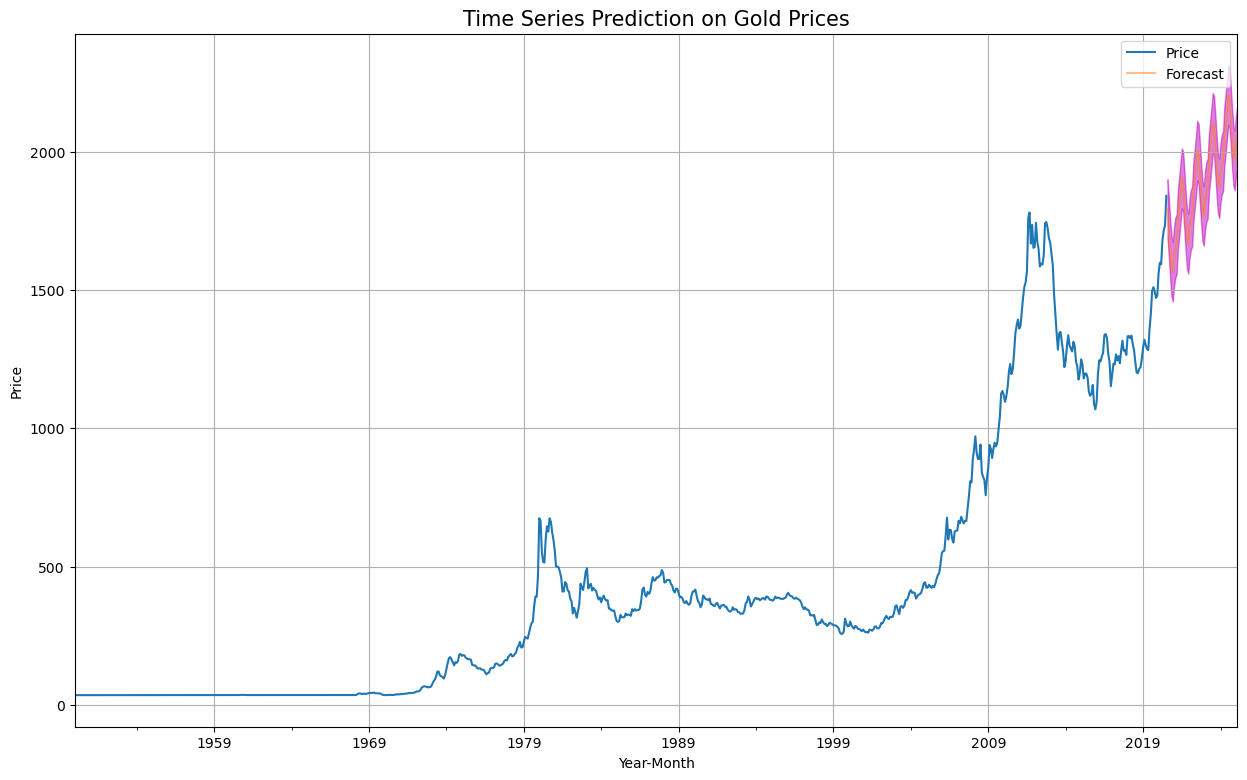

<Figure size 640x480 with 0 Axes>

In [29]:
# Plot actual and predicted values with confidence intervals
axis = df.plot(label='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.5)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Price')
plt.title('Time Series Prediction on Gold Prices',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

# Save plot as png
plt.savefig('gold_price_predictions.png')